In [262]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)

In [263]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import reuters

In [264]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

In [265]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i][sequence] = 1
    return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [266]:
# Encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [267]:
model = Sequential()
kernel_regularizer = keras.regularizers.l2(0.01)
model.add(Dense(128, activation='relu', input_shape=(10000,), kernel_regularizer=kernel_regularizer))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=kernel_regularizer))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax', kernel_regularizer=kernel_regularizer))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 128)               1280128   
                                                                 
 dropout_52 (Dropout)        (None, 128)               0         
                                                                 
 dense_99 (Dense)            (None, 128)               16512     
                                                                 
 dropout_53 (Dropout)        (None, 128)               0         
                                                                 
 dense_100 (Dense)           (None, 46)                5934      
                                                                 
Total params: 1302574 (4.97 MB)
Trainable params: 1302574 (4.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [268]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

Epoch 1/20


2023-09-27 15:00:05.702445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 2s 74ms/step - loss: 5.2559 - accuracy: 0.4665 - val_loss: 3.6424 - val_accuracy: 0.5454
Epoch 2/20
 1/15 [=>............................] - ETA: 0s - loss: 3.8154 - accuracy: 0.5625

2023-09-27 15:00:06.974774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 1s 40ms/step - loss: 3.4157 - accuracy: 0.6039 - val_loss: 3.0008 - val_accuracy: 0.6444
Epoch 3/20
15/15 [==============================] - 1s 35ms/step - loss: 2.9477 - accuracy: 0.6486 - val_loss: 2.6833 - val_accuracy: 0.6772
Epoch 4/20
15/15 [==============================] - 1s 36ms/step - loss: 2.6693 - accuracy: 0.6692 - val_loss: 2.4945 - val_accuracy: 0.6722
Epoch 5/20
15/15 [==============================] - 1s 35ms/step - loss: 2.4536 - accuracy: 0.6799 - val_loss: 2.3016 - val_accuracy: 0.7073
Epoch 6/20
15/15 [==============================] - 0s 33ms/step - loss: 2.2870 - accuracy: 0.6902 - val_loss: 2.1933 - val_accuracy: 0.7001
Epoch 7/20
15/15 [==============================] - 0s 33ms/step - loss: 2.1648 - accuracy: 0.6920 - val_loss: 2.0763 - val_accuracy: 0.7145
Epoch 8/20
15/15 [==============================] - 0s 33ms/step - loss: 2.0570 - accuracy: 0.6997 - val_loss: 2.0175 - val_accuracy: 0.6917
Epoch 9/20
15/15 [======

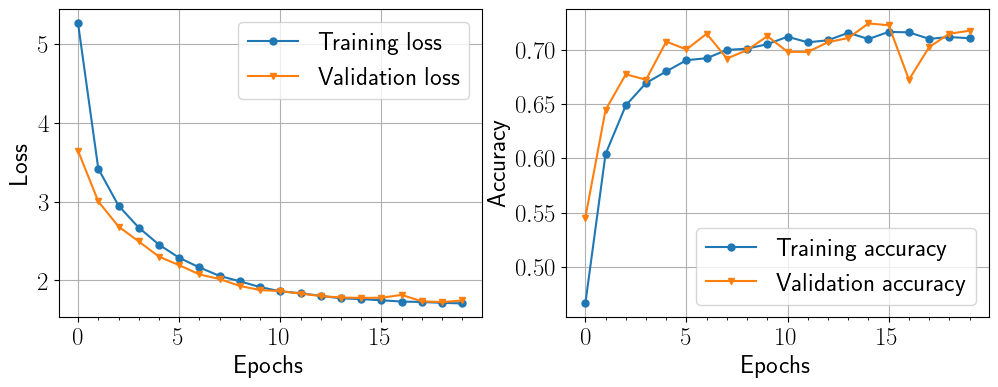

In [269]:
# Plot training and validation loss
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
marker_train = 'o'
marker_val = 'v'
marker_size = 5
color_train = 'C0'
color_val = 'C1'
axes[0].plot(history.history['loss'], label='Training loss', marker=marker_train, color=color_train, markersize=marker_size)
axes[0].plot(history.history['val_loss'], label='Validation loss', marker=marker_val, color=color_val, markersize=marker_size)
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid()
axes[1].plot(history.history['accuracy'], label='Training accuracy', marker=marker_train, color=color_train, markersize=marker_size)
axes[1].plot(history.history['val_accuracy'], label='Validation accuracy', marker=marker_val, color=color_val, markersize=marker_size)
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid()
axes[0].set_xticks(np.arange(0, 20, 1), minor=True)
axes[1].set_xticks(np.arange(0, 20, 1), minor=True)
plt.show()

# Boston housing dataset

In [270]:
from tensorflow.keras.datasets import boston_housing

In [271]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [275]:
# Normalize data
def normalize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std

In [273]:
x_train = normalize_data(x_train)
x_test = normalize_data(x_test)

In [277]:
# Build model, add regularization and dropout
kernel_regularizer = keras.regularizers.l2(0.01)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,), kernel_regularizer=kernel_regularizer))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=kernel_regularizer))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 64)                896       
                                                                 
 dropout_54 (Dropout)        (None, 64)                0         
                                                                 
 dense_102 (Dense)           (None, 64)                4160      
                                                                 
 dropout_55 (Dropout)        (None, 64)                0         
                                                                 
 dense_103 (Dense)           (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=1, validation_split=0.2)

Epoch 1/100


2023-09-27 15:02:39.395068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


321/323 [============================>.] - ETA: 0s - loss: 477.5401 - mae: 19.6108

2023-09-27 15:02:46.568788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


323/323 [==============================] - 8s 20ms/step - loss: 475.3804 - mae: 19.5595 - val_loss: 525.9044 - val_mae: 21.2669
Epoch 2/100
323/323 [==============================] - 6s 19ms/step - loss: 225.7908 - mae: 11.9334 - val_loss: 397.0209 - val_mae: 18.0266
Epoch 3/100
323/323 [==============================] - 6s 19ms/step - loss: 124.3722 - mae: 7.7233 - val_loss: 350.9791 - val_mae: 16.5024
Epoch 4/100
323/323 [==============================] - 6s 19ms/step - loss: 89.0924 - mae: 6.7073 - val_loss: 320.4615 - val_mae: 16.0588
Epoch 5/100
323/323 [==============================] - 6s 18ms/step - loss: 71.3743 - mae: 5.8760 - val_loss: 321.9247 - val_mae: 15.9449
Epoch 6/100
323/323 [==============================] - 6s 19ms/step - loss: 70.5502 - mae: 5.4450 - val_loss: 303.6433 - val_mae: 15.6454
Epoch 7/100
323/323 [==============================] - 6s 19ms/step - loss: 66.9493 - mae: 5.3515 - val_loss: 295.2263 - val_mae: 15.2854
Epoch 8/100
323/323 [====================

In [ ]:
# Plot training and validation loss
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
marker_train = 'o'
marker_val = 'v'
marker_size = 5
color_train = 'C0'
color_val = 'C1'
axes[0].plot(history.history['loss'], label='Training loss', marker=marker_train, color=color_train, markersize=marker_size)
axes[0].plot(history.history['val_loss'], label='Validation loss', marker=marker_val, color=color_val, markersize=marker_size)
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid()
axes[1].plot(history.history['mae'], label='Training MAE', marker=marker_train, color=color_train, markersize=marker_size)
axes[1].plot(history.history['val_mae'], label='Validation MAE', marker=marker_val, color=color_val, markersize=marker_size)
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid()
axes[0].set_xticks(np.arange(0, 100, 5), minor=True)
axes[1].set_xticks(np.arange(0, 100, 5), minor=True)
plt.show()